檔案網址
https://www.superdatascience.com/machine-learning/

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [3]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression
  目錄： []
  檔案： ['.DS_Store', 'Position_Salaries.csv', 'random_forest_regression.py', 'random_forest_regression.R', 'regression_template.py', 'regression_template.R']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression/.DS_Store
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression/Position_Salaries.csv
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression/random_forest_regression.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression/random_forest_regression.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 9 - Random Forest Regression/Random_Forest_Regression/regression_template.py
Machin

In [4]:
datapath= mypath + '/'+ 'Position_Salaries.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [5]:
testdata 
#可看出是非線性
#只要後兩行來做訓練

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
x = testdata.iloc[:, 1:2].values 
#左邊的 : 是整行line（0-9）
#右邊的:-1是列columns,此數據x的:-1跟 
#0雖然一樣，但在最後fit時會影響到，因為訓練時要使用x要用matrix,y要用vector
y = testdata.iloc[:, 2:3].values

In [9]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

y = y.reshape(10)
np.shape(y)
#reshape轉回vactor
y

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
#要設定多少樹
#設定random，但不確定作用？
regressor = RandomForestRegressor(n_estimators = 300,random_state=0)

regressor.fit(x,y)

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
pred_y = regressor.predict(6.5)
pred_y
#樹的量從10-->100-->300，會越來越接近真實資料

array([ 160333.33333333])

predicting a new result with Linear regresstion

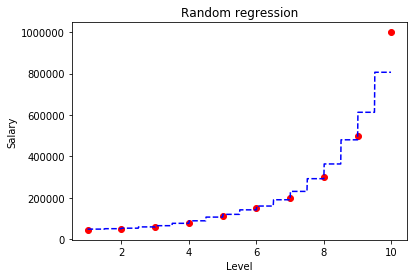

In [27]:
#可用以下來優化
x_grid = np.arange(min(x),max(x),0.01) #把x切細
x_grid = x_grid.reshape((len(x_grid),1)) #轉成matrix
plt.scatter(x,y,color = 'red')
plt.plot(x_grid,regressor.predict(x_grid),'b--')

plt.title('Random regression')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()

#因為是非連續的資料，所以要有梯狀
#加更多樹並不會增加後段準確度，只是會有更多的資料被併到某個已有的層級